## Importing Required Libraries

In [2]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

## Downloading the Dataset

In [4]:
flowers_root = keras.utils.get_file('flower_photos', 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)

228813984/228813984 [==============================] - 2s 0us/step


## Organizing Data in Folders

In [5]:
# Renaming Images
i = 1
for image in os.listdir(os.path.join(flowers_root, "daisy")):
    src = os.path.join(flowers_root, "daisy", image)
    dst = os.path.join(flowers_root, "daisy", f"daisy_{i}.jpg")
    os.rename(src, dst)
    i += 1
i = 1
for image in os.listdir(os.path.join(flowers_root, "dandelion")):
    src = os.path.join(flowers_root, "dandelion", image)
    dst = os.path.join(flowers_root, "dandelion", f"dandelion_{i}.jpg")
    os.rename(src, dst)
    i += 1
i = 1
for image in os.listdir(os.path.join(flowers_root, "roses")):
    src = os.path.join(flowers_root, "roses", image)
    dst = os.path.join(flowers_root, "roses", f"rose_{i}.jpg")
    os.rename(src, dst)
    i += 1
i = 1
for image in os.listdir(os.path.join(flowers_root, "sunflowers")):
    src = os.path.join(flowers_root, "sunflowers", image)
    dst = os.path.join(flowers_root, "sunflowers", f"sunflower_{i}.jpg")
    os.rename(src, dst)
    i += 1
i = 1
for image in os.listdir(os.path.join(flowers_root, "tulips")):
    src = os.path.join(flowers_root, "tulips", image)
    dst = os.path.join(flowers_root, "tulips", f"tulips_{i}.jpg")
    os.rename(src, dst)
    i += 1

In [6]:
# Creating Main Directories
base_dir = "./flowers"
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

In [7]:
train_daisy_dir = os.path.join(train_dir, "daisy")
os.mkdir(train_daisy_dir)
train_dandelion_dir = os.path.join(train_dir, "dandelion")
os.mkdir(train_dandelion_dir)
train_roses_dir = os.path.join(train_dir, "roses")
os.mkdir(train_roses_dir)
train_sunflowers_dir = os.path.join(train_dir, "sunflowers")
os.mkdir(train_sunflowers_dir)
train_tulips_dir = os.path.join(train_dir, "tulips")
os.mkdir(train_tulips_dir)

validation_daisy_dir = os.path.join(validation_dir, "daisy")
os.mkdir(validation_daisy_dir)
validation_dandelion_dir = os.path.join(validation_dir, "dandelion")
os.mkdir(validation_dandelion_dir)
validation_roses_dir = os.path.join(validation_dir, "roses")
os.mkdir(validation_roses_dir)
validation_sunflowers_dir = os.path.join(validation_dir, "sunflowers")
os.mkdir(validation_sunflowers_dir)
validation_tulips_dir = os.path.join(validation_dir, "tulips")
os.mkdir(validation_tulips_dir)

test_daisy_dir = os.path.join(test_dir, "daisy")
os.mkdir(test_daisy_dir)
test_dandelion_dir = os.path.join(test_dir, "dandelion")
os.mkdir(test_dandelion_dir)
test_roses_dir = os.path.join(test_dir, "roses")
os.mkdir(test_roses_dir)
test_sunflowers_dir = os.path.join(test_dir, "sunflowers")
os.mkdir(test_sunflowers_dir)
test_tulips_dir = os.path.join(test_dir, "tulips")
os.mkdir(test_tulips_dir)

In [8]:
images = [f"daisy_{i}.jpg" for i in range(1, 351)]
for image in images:
    src = os.path.join(flowers_root, "daisy", image)
    dst = os.path.join(train_daisy_dir, image)
    shutil.copyfile(src, dst)
images = [f"dandelion_{i}.jpg" for i in range(1, 351)]
for image in images:
    src = os.path.join(flowers_root, "dandelion", image)
    dst = os.path.join(train_dandelion_dir, image)
    shutil.copyfile(src, dst)
images = [f"rose_{i}.jpg" for i in range(1, 351)]
for image in images:
    src = os.path.join(flowers_root, "roses", image)
    dst = os.path.join(train_roses_dir, image)
    shutil.copyfile(src, dst)
images = [f"sunflower_{i}.jpg" for i in range(1, 351)]
for image in images:
    src = os.path.join(flowers_root, "sunflowers", image)
    dst = os.path.join(train_sunflowers_dir, image)
    shutil.copyfile(src, dst)
images = [f"tulips_{i}.jpg" for i in range(1, 351)]
for image in images:
    src = os.path.join(flowers_root, "tulips", image)
    dst = os.path.join(train_tulips_dir, image)
    shutil.copyfile(src, dst)

In [9]:
images = [f"daisy_{i}.jpg" for i in range(351, 501)]
for image in images:
    src = os.path.join(flowers_root, "daisy", image)
    dst = os.path.join(validation_daisy_dir, image)
    shutil.copyfile(src, dst)
images = [f"dandelion_{i}.jpg" for i in range(351, 501)]
for image in images:
    src = os.path.join(flowers_root, "dandelion", image)
    dst = os.path.join(validation_dandelion_dir, image)
    shutil.copyfile(src, dst)
images = [f"rose_{i}.jpg" for i in range(351, 501)]
for image in images:
    src = os.path.join(flowers_root, "roses", image)
    dst = os.path.join(validation_roses_dir, image)
    shutil.copyfile(src, dst)
images = [f"sunflower_{i}.jpg" for i in range(351, 501)]
for image in images:
    src = os.path.join(flowers_root, "sunflowers", image)
    dst = os.path.join(validation_sunflowers_dir, image)
    shutil.copyfile(src, dst)
images = [f"tulips_{i}.jpg" for i in range(351, 501)]
for image in images:
    src = os.path.join(flowers_root, "tulips", image)
    dst = os.path.join(validation_tulips_dir, image)
    shutil.copyfile(src, dst)

In [10]:
images = [f"daisy_{i}.jpg" for i in range(501, 601)]
for image in images:
    src = os.path.join(flowers_root, "daisy", image)
    dst = os.path.join(test_daisy_dir, image)
    shutil.copyfile(src, dst)
images = [f"dandelion_{i}.jpg" for i in range(501, 601)]
for image in images:
    src = os.path.join(flowers_root, "dandelion", image)
    dst = os.path.join(test_dandelion_dir, image)
    shutil.copyfile(src, dst)
images = [f"rose_{i}.jpg" for i in range(501, 601)]
for image in images:
    src = os.path.join(flowers_root, "roses", image)
    dst = os.path.join(test_roses_dir, image)
    shutil.copyfile(src, dst)
images = [f"sunflower_{i}.jpg" for i in range(501, 601)]
for image in images:
    src = os.path.join(flowers_root, "sunflowers", image)
    dst = os.path.join(test_sunflowers_dir, image)
    shutil.copyfile(src, dst)
images = [f"tulips_{i}.jpg" for i in range(501, 601)]
for image in images:
    src = os.path.join(flowers_root, "tulips", image)
    dst = os.path.join(test_tulips_dir, image)
    shutil.copyfile(src, dst)

## Building ConvBase Model

In [23]:
conv_base = VGG16(include_top=False, weights="imagenet", input_shape=(150, 150, 3))

In [30]:
conv_base.trainable = False
for layer in conv_base.layers:
    if layer.name.startswith("block5"):
        layer.trainable = True

## Building Generators

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode="categorical")
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode="categorical")
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode="categorical")

Found 1750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


## Building Model

In [32]:
model = Sequential([conv_base,
                    layers.Flatten(),
                    layers.Dense(256, activation="relu"),
                    layers.BatchNormalization(),
                    layers.Dropout(0.25),
                    layers.Dense(len(train_generator.class_indices), activation="softmax")])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                      

## Compiling the Model

In [38]:
optimizer = RMSprop(learning_rate=2e-5)
model.compile(optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

## Fitting the Model

In [35]:
h = model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
88/88 [==============================] - 18s 193ms/step - loss: 1.7379 - accuracy: 0.3560 - val_loss: 1.4049 - val_accuracy: 0.3547
Epoch 2/100
88/88 [==============================] - 16s 185ms/step - loss: 1.3130 - accuracy: 0.5074 - val_loss: 1.0101 - val_accuracy: 0.6333
Epoch 3/100
88/88 [==============================] - 16s 185ms/step - loss: 1.1552 - accuracy: 0.5657 - val_loss: 0.8129 - val_accuracy: 0.7333
Epoch 4/100
88/88 [==============================] - 16s 183ms/step - loss: 0.9987 - accuracy: 0.6303 - val_loss: 0.7282 - val_accuracy: 0.7480
Epoch 5/100
88/88 [==============================] - 17s 194ms/step - loss: 0.9140 - accuracy: 0.6560 - val_loss: 0.6829 - val_accuracy: 0.7640
Epoch 6/100
88/88 [==============================] - 16s 183ms/step - loss: 0.8952 - accuracy: 0.6686 - val_loss: 0.6531 - val_accuracy: 0.7773
Epoch 7/100
88/88 [==============================] - 17s 193ms/step - loss: 0.8902 - accuracy: 0.6606 - val_loss: 0.6337 - val_accuracy:

## Evaluating the Model

In [46]:
model.evaluate(test_generator)

25/25 [==============================] - 2s 60ms/step - loss: 0.5831 - accuracy: 0.7920


[0.5830870866775513, 0.7919999957084656]

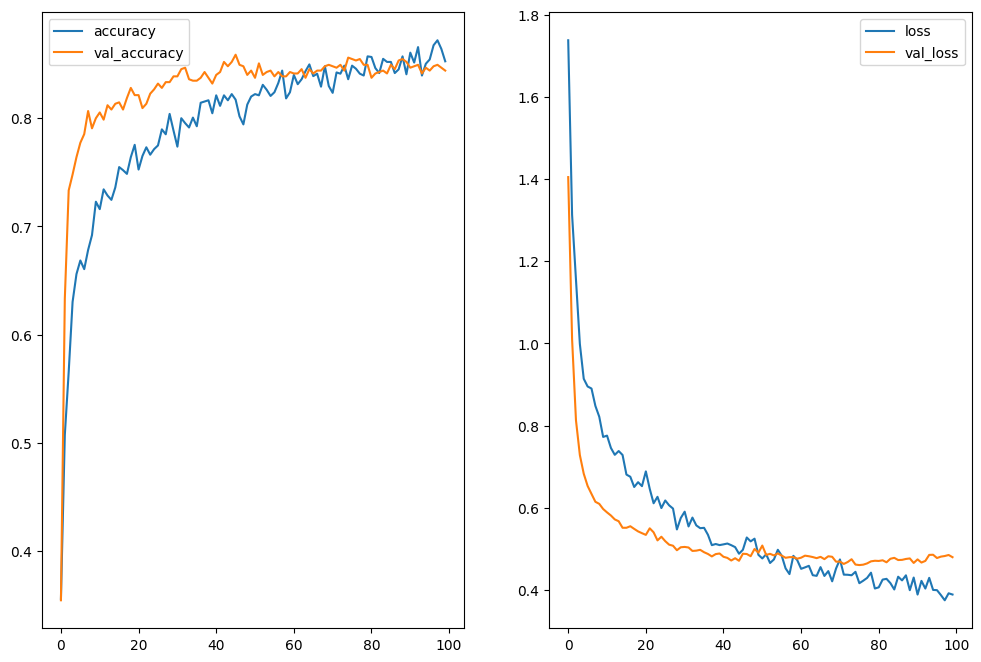

In [52]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(h.history["accuracy"], label="accuracy")
plt.plot(h.history["val_accuracy"], label="val_accuracy")
plt.legend(loc="best")
plt.subplot(1, 2, 2)
plt.plot(h.history["loss"], label="loss")
plt.plot(h.history["val_loss"], label="val_loss")
plt.legend(loc="best")
plt.show()